### Titanic Competition: Step by step
This is a step by step presentation of the solution for the titanic problem on kaggle. Using a data scientist's point of view, I will:
1. [define the problem](#define)
2. [perform an exploratory data analysis with visualizations](#analysis)
3. [train and optimize different models](#train)
4. [submit the results](#submit)

<a id='define'></a>
## 1. Define the problem

It is a classic binary classification problem based on the true tragic story of the Titanic shipwreck.
We analyze different variables (conditions and features of each passenger) to predict the chance of survival.

<a id='analysis'></a>
## 2. Exploratory Data Analysis (EDA)

In [7]:
# Load necessary libraries and modules
# data analysis and wrangling
import numpy as np
import pandas as pd
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.ensemble import RandomForestClassifier
#from sklearn import 

In [10]:
train_data = pd.read_csv("./data/train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
test_data = pd.read_csv("./data/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [15]:
women = train_data.loc[train_data.Sex == 'female']["Survived"]
rate_women = sum(women) / len(women)

print(f"{rate_women}% of women have survived")

0.7420382165605095% of women have survived


In [16]:
men = train_data.loc[train_data.Sex == 'male']["Survived"]
rate_men = sum(men) / len(men)

print(f"{rate_men}% of men who survived:")

0.18890814558058924% of men who survived:


In [25]:
# Here are the features (columns in the data set)
print(train_data.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [31]:
# Information about the features in the training and test data (data type, missigng values, ...)
print("*"*50)
train_data.info()
print("*"*50)
test_data.info()
print("*"*50)

**************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
**************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dty

## Type of features
This would help us select the appropriate plots for visualization and suitable methods for feature engineering.

__Categorical features__: Survived, Sex, Pclass, Embarked


__Numerical features__: Age, SibSp, Parch, Fare

__Features with missing values__: 
* In the training data: Age, Cabin, Embarked
* In the test data: Age, Cabin, Fare

In [32]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [35]:
train_data.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


## Which features correlate with the survival rate?
I first analyze the descrete variables by pivoting features.
* According to below results, there is a significant correlation among Pclass and Sex with the survival rate.
* Since some values for Parch and SibSp features have zero correlation with the survival rate, it is better to create a new or a set of new features from them.

In [51]:
# Feature 1: Pclass
train_data[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [52]:
# Feature 2: Sex
train_data[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [57]:
# Feature 3: Parch
train_data[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [54]:
# Feature 4: SibSp
train_data[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


## Which features correlate with the survival rate?
Secondly, I will study the correlation of features with the survival rate using visualization methods.

* Age should be definitely be included in the model (null values should be filled).
* Pclass has also very much affected the survival rate of the passengers.
* Survival rate is also depending on the ports of embarkation.
* Looking at the bar plot for Fare feature shows a explicit correlation between the Fare and the survival rate.

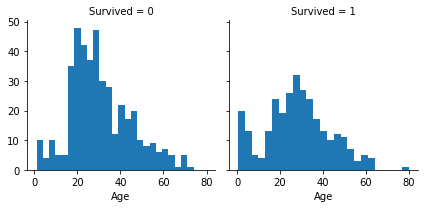

In [62]:
# Feature 1 (Age):
grid = sns.FacetGrid(train_data, col='Survived')
grid.map(plt.hist, 'Age', bins=25)

C:\Users\mbahmani\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


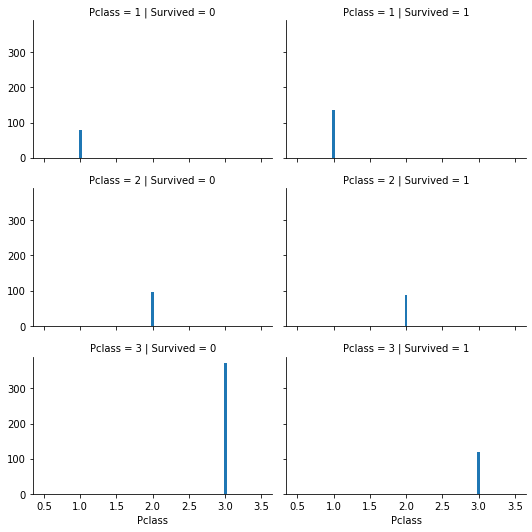

In [63]:
# Feature 2 (Pclass):
grid = sns.FacetGrid(train_data, col='Survived', row='Pclass', size=2.5, aspect=1.5)
grid.map(plt.hist, 'Pclass', bins=25)

C:\Users\mbahmani\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


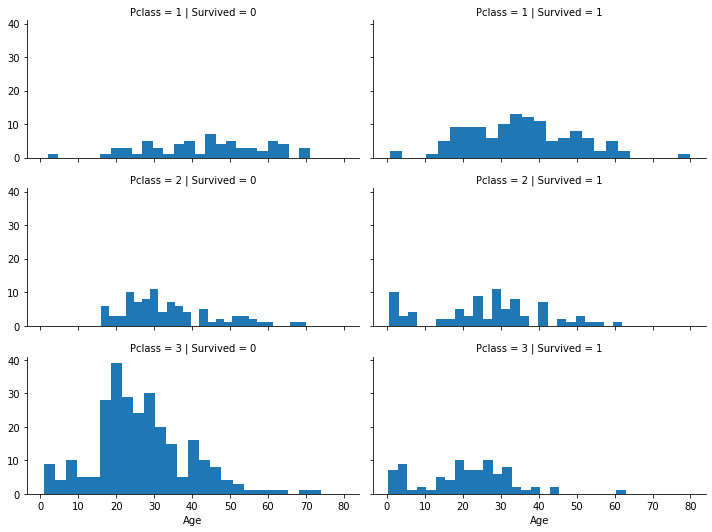

In [68]:
# Feature 2 (Pclass):
grid = sns.FacetGrid(train_data, col='Survived', row='Pclass', size=2.5, aspect=2)
grid.map(plt.hist, 'Age', bins=25)
#grid.add_legend();

C:\Users\mbahmani\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


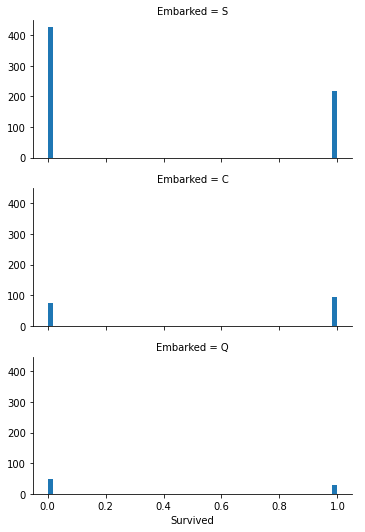

In [83]:
# Feature 3 (Embarked):
grid = sns.FacetGrid(train_data, row='Embarked', size=2.5, aspect=2)
grid.map(plt.hist, 'Survived', bins=50)
grid.add_legend();

C:\Users\mbahmani\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\mbahmani\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\mbahmani\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\axisgrid.py:675: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


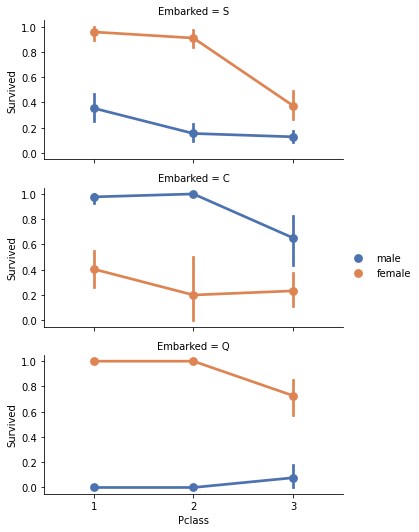

In [82]:
# Feature 3 (Embarked):
grid = sns.FacetGrid(train_data, row='Embarked', size=2.5, aspect=2)
grid.map(sns.pointplot, 'Pclass','Survived', 'Sex', palette='deep')
grid.add_legend();

C:\Users\mbahmani\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\mbahmani\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


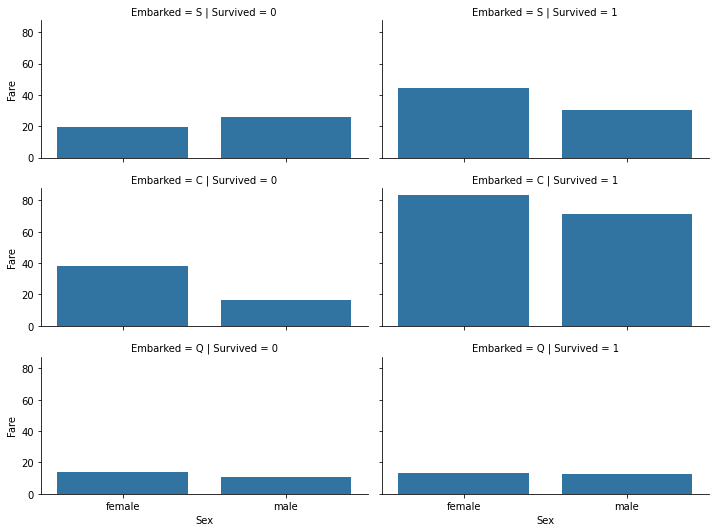

In [86]:
# Feature 4 (Fare):
grid = sns.FacetGrid(train_data, row='Embarked', col='Survived', size=2.5, aspect=2)
grid.map(sns.barplot, 'Sex', 'Fare', ci=None)
grid.add_legend();

## Execute our decision and assumptions for correcting, creating, and completing goals.
* Dropping Features: Ticket, Cabin, PassengerId, Name (maybe bring it to the model later )
* Convert the categorical features: Sex, 

In [87]:
# Drop Ticket and Cabin for both train and test data

print("Before dropping, train, test", train_data.shape, test_data.shape)

train_data = train_data.drop(['Ticket', 'Cabin'], axis=1)
test_data = test_data.drop(['Ticket', 'Cabin'], axis=1)

print("After dropping, train, test:", train_data.shape, test_data.shape)

Before dropping, train, test (891, 12) (418, 11)
After dropping, train, test: (891, 10) (418, 9)


In [94]:
# Drop PassengerId and Name for train data and only Name for test data, because later on we are going to report and submit the results based on PassengerId

print("Before dropping, train, test", train_data.shape, test_data.shape)

train_data = train_data.drop(['PassengerId', 'Name'], axis=1)
test_data = test_data.drop(['Name'], axis=1)

print("After dropping, train, test:", train_data.shape, test_data.shape)

Before dropping, train, test (891, 8) (418, 8)


KeyError: "['PassengerId' 'Name'] not found in axis"

In [95]:
# Convert the Sex feature
print("Before converting, train, test:", train_data.info(), test_data.info())

train_data['Sex'] = train_data['Sex'].map( {'female': 1, 'male': 0} ).astype(int)
test_data['Sex'] = test_data['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

print("After converting, train, test:", train_data.info(), test_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    object 
 3   Age          332 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6 

AttributeError: 'Series' object has no attribute 'info'

<a id='train'></a>
## 3. Model Training and Optimization

In [21]:
# RandomForestClassifier
y_train = train_data["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch"]
X_train = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

model_RF = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model_RF.fit(X_train, y_train)
predict_RF = model_RF.predict(X_test)


print(predict_RF)

# score on training data, while there are no Y_test
accuracy_RF = model_RF.score(X_train, y_train)

print(accuracy_RF)


[0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 1 0
 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 1 0 0 1 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]
0.8159371492704826


<a id='submit'></a>
## 4. Submit the Results

In [23]:
# RandomForestClassifier
submission = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predict_RF})
submission.to_csv('submission.csv', index=False)
submission.head()
#print("Your submission was successfully saved!")

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
